In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Loading and Preprocessing:

In [ ]:
# Exploratory Data Analysis (EDA)
# 1. Summary statistics
print(df.describe())

               Age       Gender          BMI          SBP          DBP  \
count  4303.000000  4303.000000  4303.000000  4303.000000  4303.000000   
mean     48.085057     1.351615    24.123923   123.219382    76.360446   
std      14.686155     0.477530     3.397294    17.513858    11.004056   
min      22.000000     1.000000    15.600000    72.000000    45.000000   
25%      35.000000     1.000000    21.700000   111.000000    69.000000   
50%      46.000000     1.000000    24.000000   122.000000    76.000000   
75%      59.000000     2.000000    26.300000   134.000000    83.000000   
max      93.000000     2.000000    45.800000   200.000000   134.000000   

               FPG         Chol          Tri          HDL          LDL  \
count  4303.000000  4303.000000  4303.000000  4303.000000  4303.000000   
mean      5.226368     4.860753     1.588476     1.666765     2.976220   
std       0.781089     0.925377     1.260003     1.079377     0.892196   
min       1.780000     1.650000     0

In [ ]:
# 2. Check for missing values
print(df.isnull().sum())

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64


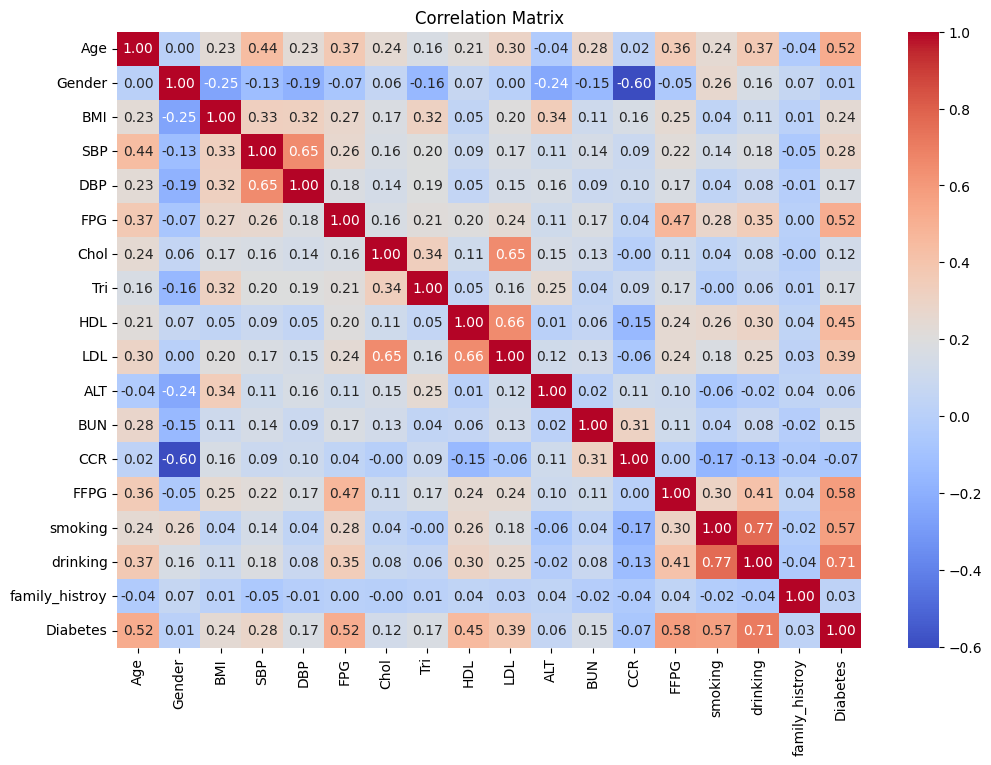

In [ ]:
# 3. Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

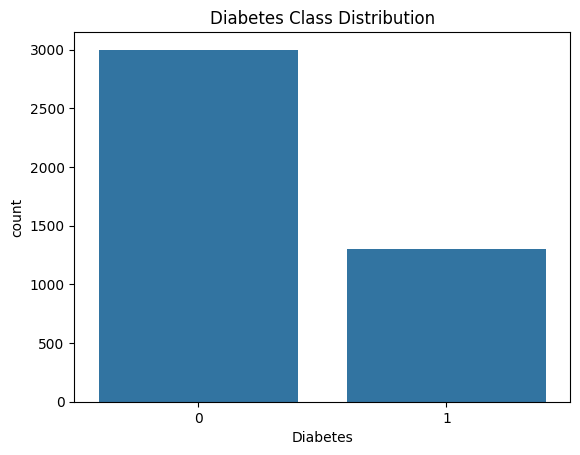

In [ ]:
# 4. Distribution of target variable (Diabetes)
sns.countplot(x='Diabetes', data=df)
plt.title("Diabetes Class Distribution")
plt.show()

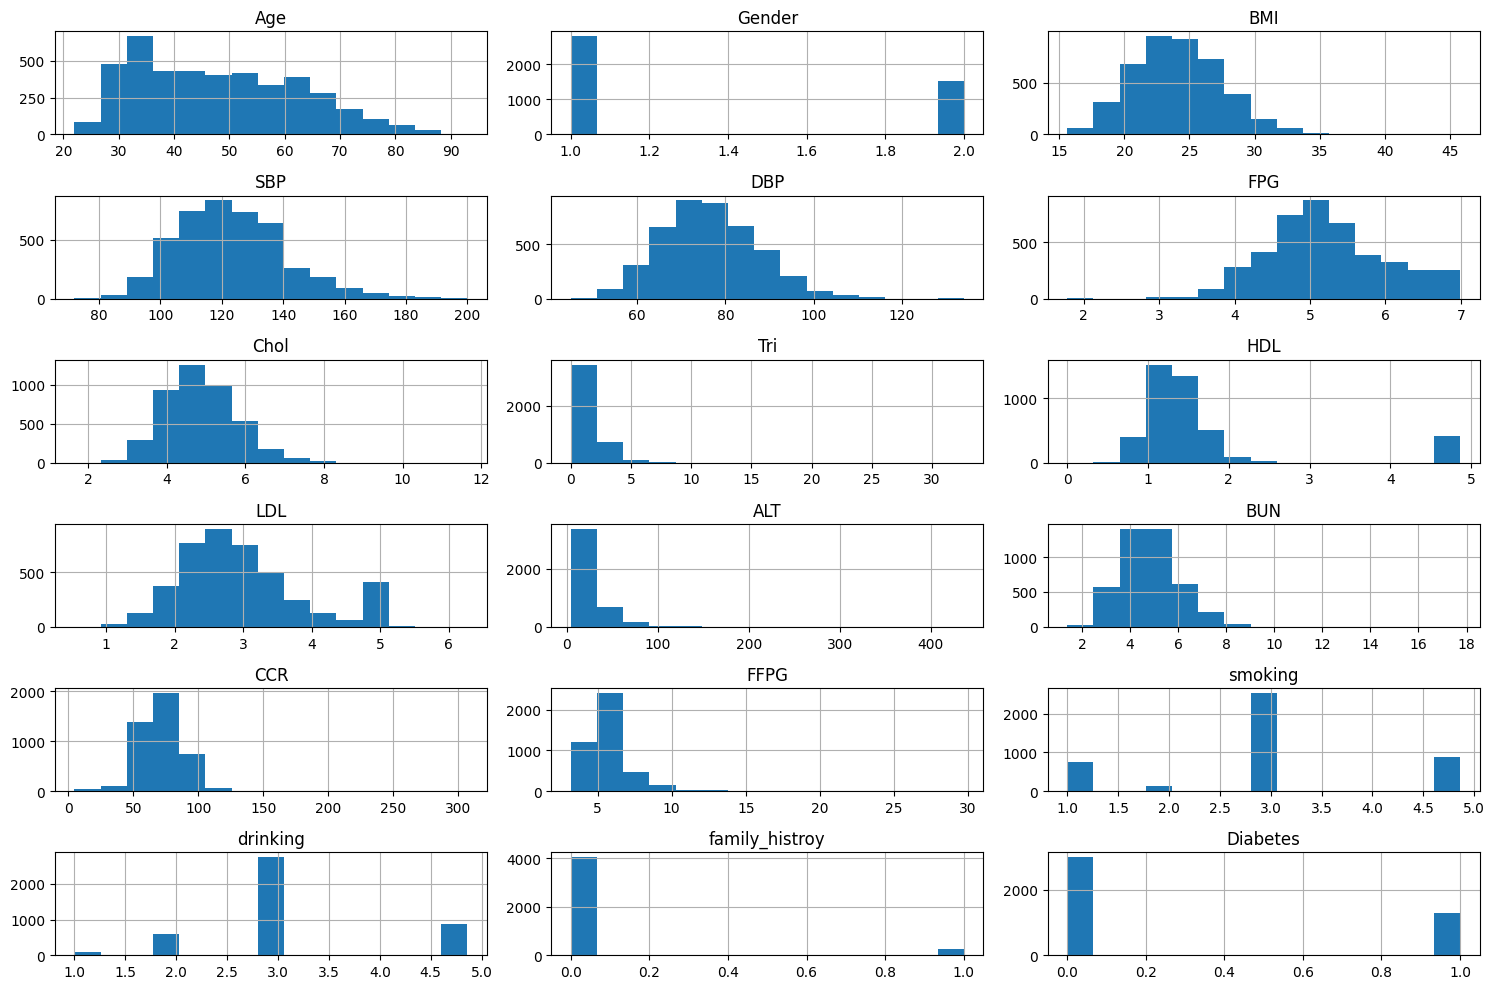

In [ ]:
# 5. Distribution of numerical features
df.hist(bins=15, figsize=(15, 10), layout=(6, 3)) # Changed the layout to 6x3 to accommodate 18 plots
plt.tight_layout()
plt.show()

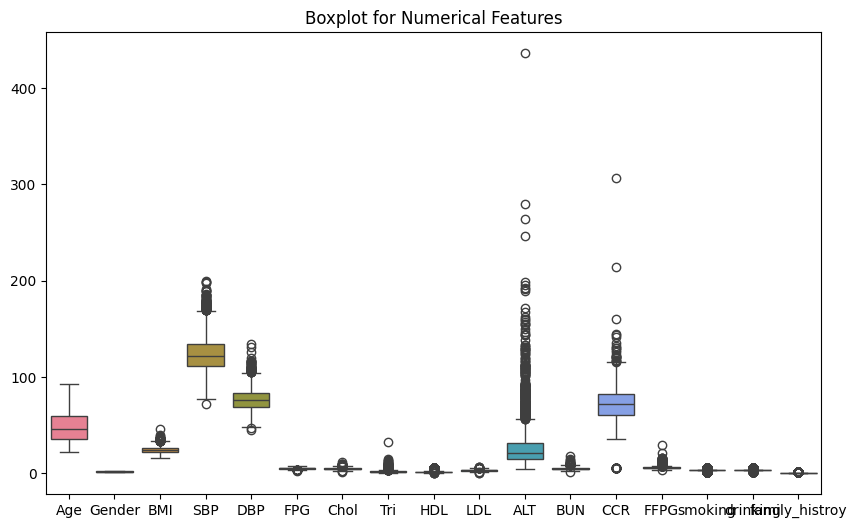

In [ ]:
# 6. Boxplots to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Diabetes']))
plt.title("Boxplot for Numerical Features")
plt.show()

In [ ]:
# Cap outliers at 1st and 99th percentiles for the relevant features
def cap_outliers(df, columns):
    for col in columns:
        lower_limit = df[col].quantile(0.01)
        upper_limit = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    return df

# List of columns with visible outliers
outlier_columns = ['SBP', 'DBP', 'ALT', 'LDL', 'CCR', 'BUN']

# Cap the outliers in these columns
df_cleaned = cap_outliers(df, outlier_columns)

# Proceed with the rest of preprocessing steps (scaling, train-test split, etc.)


In [ ]:
# Feature Selection - Keep highly correlated features only
selected_features = ['FFPG', 'FPG', 'Age', 'drinking', 'HDL', 'BMI', 'Diabetes']
df_selected = df[selected_features]

In [ ]:
# Split the dataset into features (X) and target (y)
X = df_selected.drop(columns=['Diabetes'])
y = df_selected['Diabetes']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Class Balancing with SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

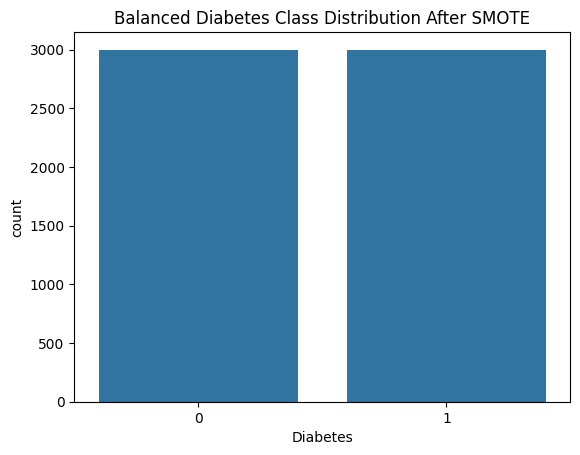

In [ ]:
# Visualize the new balanced target distribution after SMOTE
sns.countplot(x=y_resampled)
plt.title("Balanced Diabetes Class Distribution After SMOTE")
plt.show()

Model Building:

1.   Machine Learning
2.   Deep Learning



Logistic Regression:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import numpy as np

# Step 1: Hyperparameter Tuning using GridSearchCV with Cross-Validation
# Define hyperparameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Solver algorithms
    'penalty': ['l2'],  # Regularization type (l2 is common for logistic regression)
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters found:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Step 2: Cross-Validation Evaluation
# Best Logistic Regression model after hyperparameter tuning
best_log_reg = grid_search.best_estimator_

# Perform cross-validation on the tuned model
cv_scores = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation in CV Accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.94479167 0.940625   0.94270833 0.94270833 0.94895833]
Mean CV Accuracy: 0.9440
Standard Deviation in CV Accuracy: 0.0028


Tuned Logistic Regression Accuracy: 0.9291666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       613
           1       0.95      0.90      0.93       587

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200



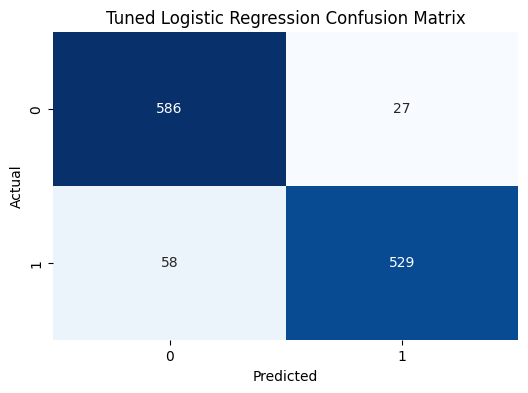

In [ ]:
# Step 3: Model Evaluation on Test Set
# Predict on the test set using the best model
y_pred_best_log_reg = best_log_reg.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_best_log_reg)
print("Tuned Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_best_log_reg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

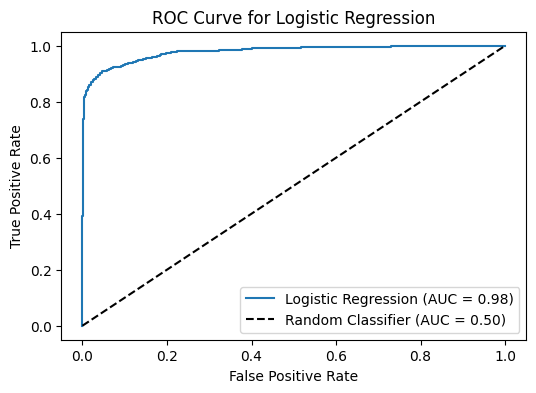

Logistic Regression AUC: 0.98


In [ ]:
# Step 4: ROC Curve and AUC
y_pred_prob_best_log_reg = best_log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best_log_reg)
auc = roc_auc_score(y_test, y_pred_prob_best_log_reg)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"Logistic Regression AUC: {auc:.2f}")

Random Forest:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Train the Random Forest Model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Step 2: Predict on the test set
y_pred_rf = rf.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9491666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       613
           1       0.96      0.94      0.95       587

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



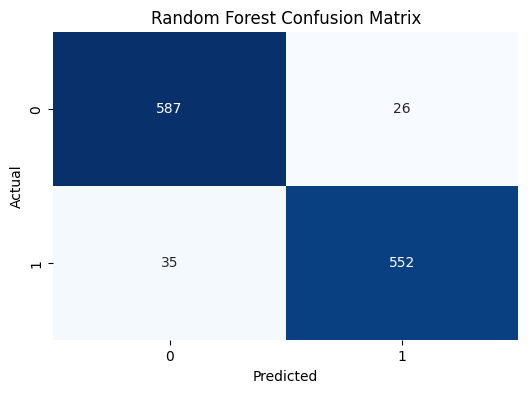

In [ ]:
# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

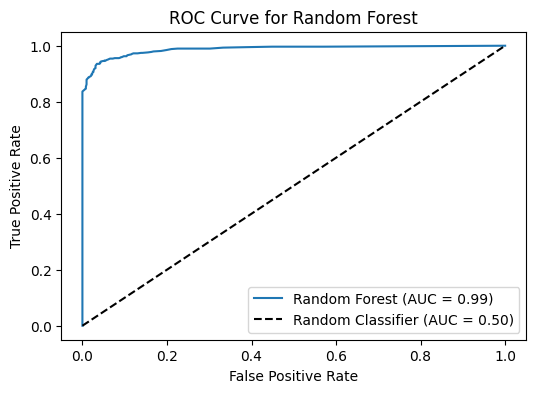

Random Forest AUC: 0.99


In [ ]:

# Step 4: ROC Curve and AUC
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
auc = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"Random Forest AUC: {auc:.2f}")

Feature Importance:

In [ ]:
# Get feature importance scores
feature_importance = rf.feature_importances_

# Create a DataFrame to organize feature names with their importance
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)


<ipython-input-25-e187633564d4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


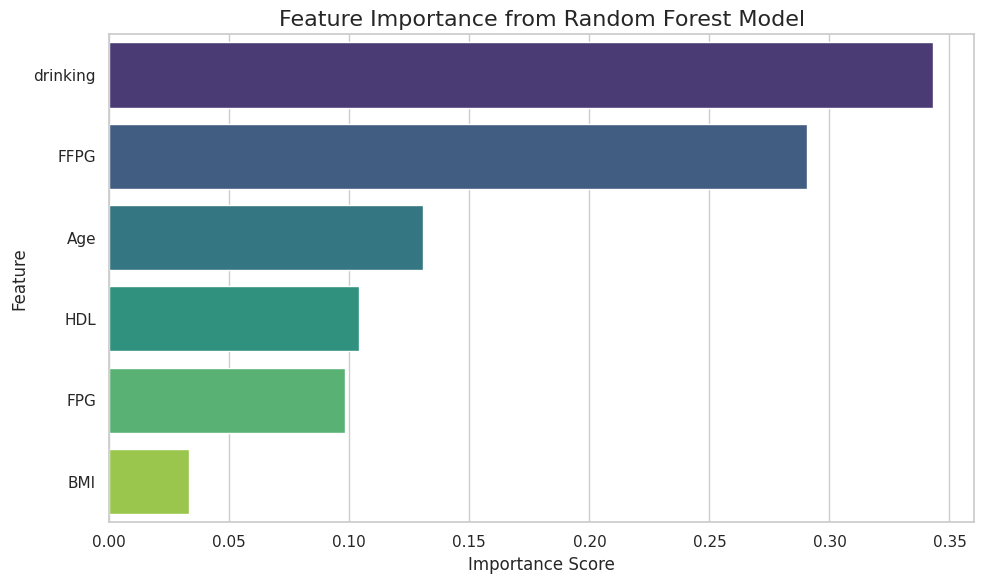

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')

# Add title and labels
plt.title('Feature Importance from Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Step 5: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", rf_grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

Decision Tree:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Train the Decision Tree model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Step 2: Predict on the test set
y_pred_dt = dt.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9208333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       613
           1       0.91      0.93      0.92       587

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.92      0.92      0.92      1200



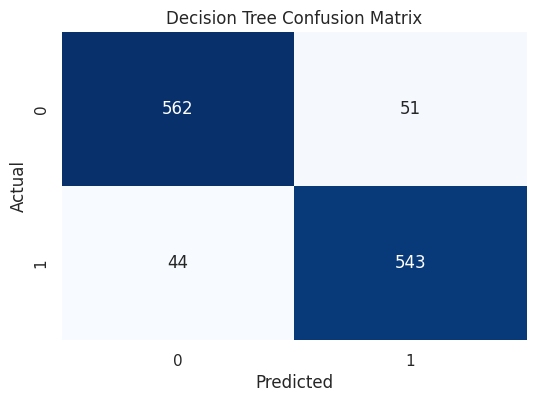

In [ ]:
# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

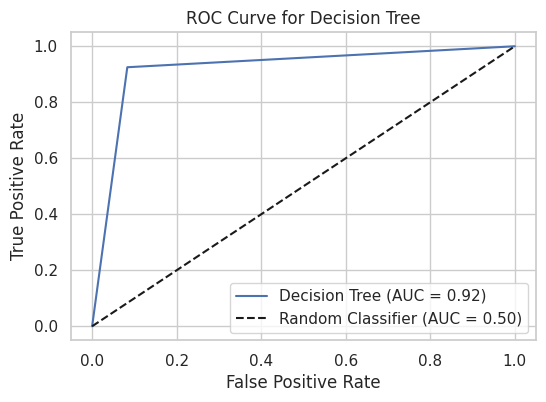

Decision Tree AUC: 0.92


In [ ]:
# Step 4: ROC Curve and AUC
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_dt)
auc = roc_auc_score(y_test, y_pred_prob_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"Decision Tree AUC: {auc:.2f}")

In [ ]:
# Step 5: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
dt_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", dt_grid_search.best_params_)

In [ ]:
# Step 6: Evaluate the tuned Decision Tree model
best_dt = dt_grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

# Evaluate performance of the best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print("Tuned Decision Tree Accuracy:", accuracy_best_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_best_dt))

# Confusion Matrix for tuned Decision Tree
cm_best_dt = confusion_matrix(y_test, y_pred_best_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

SVM:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Train the SVM model (with probability=True for ROC)
svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
# Step 2: Predict on the test set
y_pred_svm = svm.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.945
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       613
           1       0.96      0.92      0.94       587

    accuracy                           0.94      1200
   macro avg       0.95      0.94      0.94      1200
weighted avg       0.95      0.94      0.94      1200



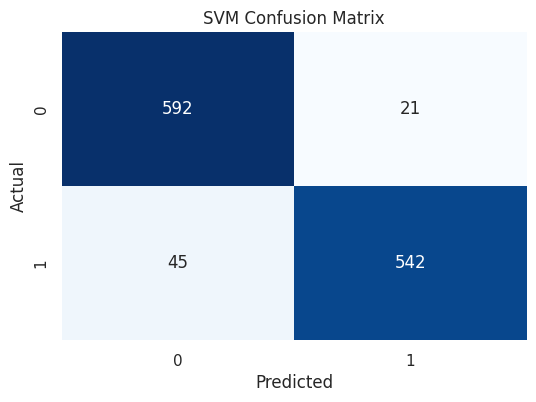

In [ ]:
# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

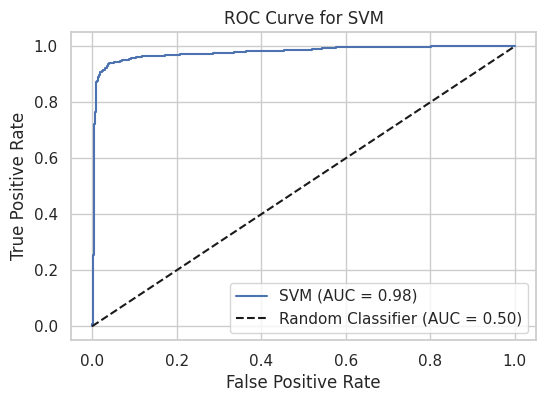

SVM AUC: 0.98


In [ ]:
# Step 4: ROC Curve and AUC
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svm)
auc = roc_auc_score(y_test, y_pred_prob_svm)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"SVM AUC: {auc:.2f}")


In [ ]:
# Step 5: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", svm_grid_search.best_params_)

In [ ]:
# Step 5: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear']
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
svm_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", svm_grid_search.best_params_)

In [ ]:
# Step 6: Evaluate the tuned SVM model
best_svm = svm_grid_search.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)

# Evaluate performance of the best model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print("Tuned SVM Accuracy:", accuracy_best_svm)
print("Classification Report:\n", classification_report(y_test, y_pred_best_svm))

# Confusion Matrix for tuned SVM
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Tuned SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Gradient Boosting Machine:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Train the Gradient Boosting Machine (GBM) model
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Step 2: Predict on the test set
y_pred_gbm = gbm.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_gbm)
print("GBM Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_gbm))

GBM Accuracy: 0.9475
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       613
           1       0.96      0.93      0.95       587

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



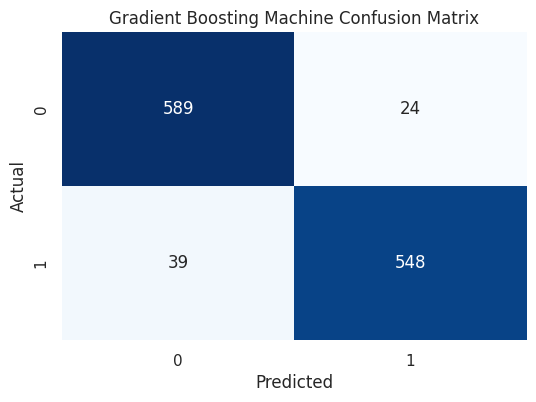

In [ ]:
# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Gradient Boosting Machine Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

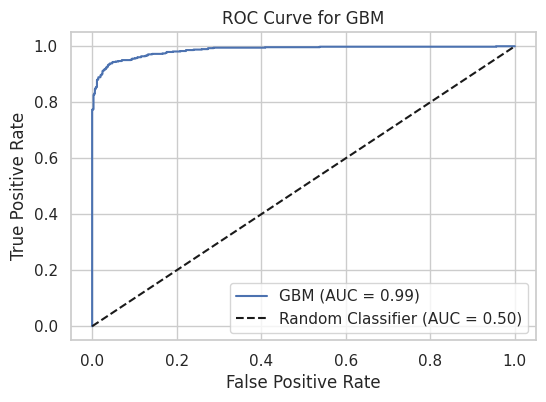

GBM AUC: 0.99


In [ ]:
# Step 4: ROC Curve and AUC
y_pred_prob_gbm = gbm.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gbm)
auc = roc_auc_score(y_test, y_pred_prob_gbm)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'GBM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GBM')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"GBM AUC: {auc:.2f}")

In [ ]:
# Step 5: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
gbm_grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
gbm_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", gbm_grid_search.best_params_)

In [ ]:
# Step 6: Evaluate the tuned GBM model
best_gbm = gbm_grid_search.best_estimator_
y_pred_best_gbm = best_gbm.predict(X_test)

# Evaluate performance of the best model
accuracy_best_gbm = accuracy_score(y_test, y_pred_best_gbm)
print("Tuned GBM Accuracy:", accuracy_best_gbm)
print("Classification Report:\n", classification_report(y_test, y_pred_best_gbm))

# Confusion Matrix for tuned GBM
cm_best_gbm = confusion_matrix(y_test, y_pred_best_gbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_gbm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Tuned GBM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

XGBoost

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Step 1: Train the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Step 2: Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9408333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       613
           1       0.94      0.93      0.94       587

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



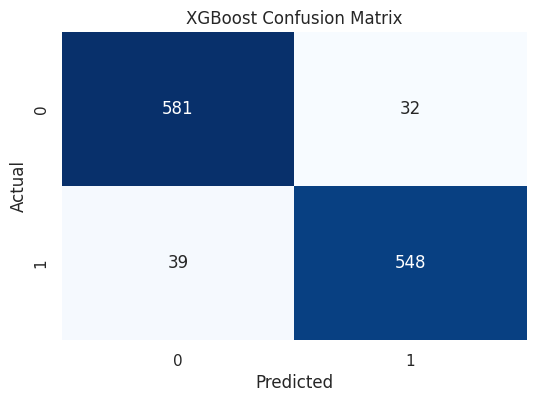

In [ ]:
# Step 3: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

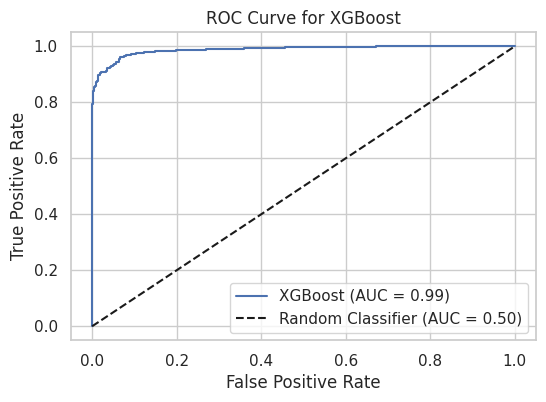

XGBoost AUC: 0.99


In [ ]:
# Step 4: ROC Curve and AUC
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
auc = roc_auc_score(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"XGBoost AUC: {auc:.2f}")

In [ ]:
# Step 5: Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", xgb_grid_search.best_params_)

In [ ]:
# Step 6: Evaluate the tuned XGBoost model
best_xgb = xgb_grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate performance of the best model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Tuned XGBoost Accuracy:", accuracy_best_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

# Confusion Matrix for tuned XGBoost
cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Tuned XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

2-Deep Learning:

ANN:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Build the ANN model
ann = Sequential()
ann.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
ann.add(Dense(16, activation='relu'))  # Second hidden layer
ann.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# Compile the model
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Step 2: Train the model
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7205 - loss: 0.4615 - val_accuracy: 0.9323 - val_loss: 0.2054
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9265 - loss: 0.1926 - val_accuracy: 0.9458 - val_loss: 0.1538
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9330 - loss: 0.1671 - val_accuracy: 0.9458 - val_loss: 0.1437
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9489 - loss: 0.1354 - val_accuracy: 0.9521 - val_loss: 0.1378
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9486 - loss: 0.1390 - val_accuracy: 0.9521 - val_loss: 0.1355
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9492 - loss: 0.1356 - val_accuracy: 0.9521 - val_loss: 0.1333
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9506 - loss: 0.1350 - val_accuracy: 0.9531 - val_loss: 0.1331
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9556 - loss: 0.1246 - val_accuracy: 0

In [ ]:
# Step 3: Predict on the test set
y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_ann))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ANN Accuracy: 0.9516666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       613
           1       0.96      0.94      0.95       587

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



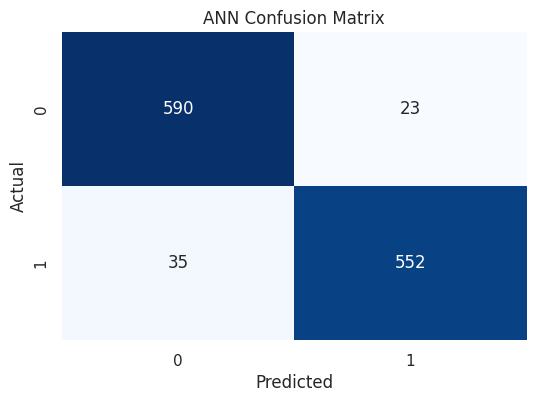

In [ ]:
# Step 4: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('ANN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


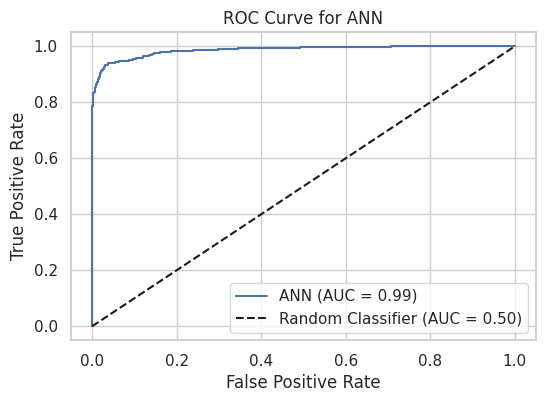

ANN AUC: 0.99


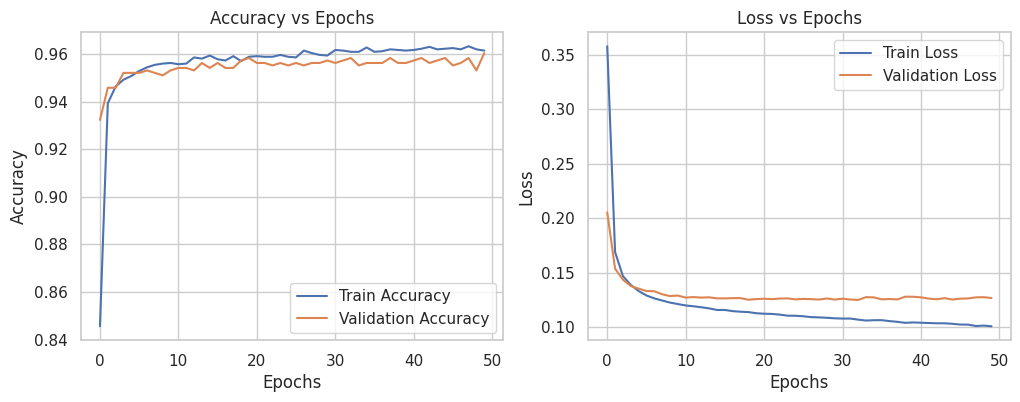

In [ ]:
# Step 5: ROC Curve and AUC
y_pred_prob_ann = ann.predict(X_test).ravel()  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_ann)
auc = roc_auc_score(y_test, y_pred_prob_ann)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"ANN AUC: {auc:.2f}")

# Optional Step: Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Step 6: Hyperparameter Tuning
!pip install -q keras-tuner
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from kerastuner import RandomSearch
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Define a function to build the model with tunable hyperparameters
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=16, max_value=128, step=16), activation='relu', input_dim=X_train.shape[1]))

    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Tune between 1 and 3 hidden layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16), activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp.Float('lr', min_value=0.0001, max_value=0.01, sampling='LOG')),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Step 2: Initialize the Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Objective to maximize
    max_trials=10,  # Number of models to try
    executions_per_trial=2,  # Average over multiple runs to avoid random variance
    directory='ann_tuning',  # Directory to store tuning logs
    project_name='diabetes_prediction'
)

# Step 3: Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=1)

# Step 4: Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model on the full training set
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

# Step 5: Evaluate the best model on the test set
y_pred_best_ann = (best_model.predict(X_test) > 0.5).astype(int)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_best_ann)
print("Tuned ANN Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_best_ann))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_ann)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Tuned ANN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve and AUC
y_pred_prob_best_ann = best_model.predict(X_test).ravel()  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_best_ann)
auc = roc_auc_score(y_test, y_pred_prob_best_ann)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned ANN')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"Tuned ANN AUC: {auc:.2f}")


CNN:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Preprocess data for CNN
# Ensure the timesteps dimension is large enough for MaxPooling1D
# Reshape to (samples, features, timesteps)
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Step 2: Build the CNN model
cnn = Sequential()

# Add 1D convolutional layer with the correct input shape
cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))

# Add max pooling layer with pool_size=1
cnn.add(MaxPooling1D(pool_size=1)) # Changed pool_size to 1

# Add another convolutional layer
cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

# Add another pooling layer with pool_size=1
cnn.add(MaxPooling1D(pool_size=1)) # Changed pool_size to 1

# Flatten the output to feed into a dense layer
cnn.add(Flatten())

# Add a fully connected layer (dense)
cnn.add(Dense(64, activation='relu'))

# Add dropout for regularization
cnn.add(Dropout(0.5))

# Output layer (sigmoid for binary classification)
cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3: Train the model
history = cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8685 - loss: 0.3670 - val_accuracy: 0.9510 - val_loss: 0.1428
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9494 - loss: 0.1423 - val_accuracy: 0.9521 - val_loss: 0.1377
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9500 - loss: 0.1435 - val_accuracy: 0.9510 - val_loss: 0.1394
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9413 - loss: 0.1474 - val_accuracy: 0.9552 - val_loss: 0.1327
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1293 - val_accuracy: 0.9510 - val_loss: 0.1362
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.1265 - val_accuracy: 0.9521 - val_loss: 0.1293
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9598 - loss: 0.1159 - val_accuracy: 0.9521 - val_loss: 0.1311
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1166 - val_accuracy: 0.

In [ ]:
# Step 4: Predict on the test set
y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype(int)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
CNN Accuracy: 0.9491666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       613
           1       0.95      0.94      0.95       587

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



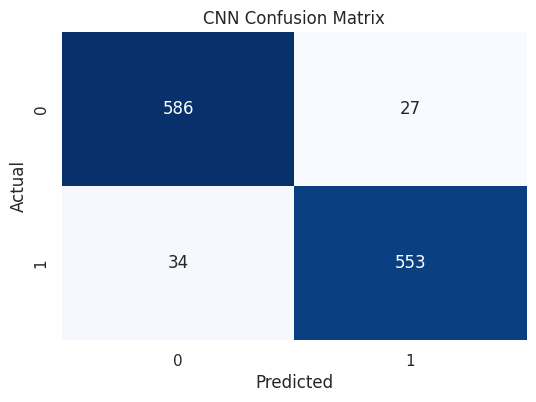

In [ ]:
# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('CNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


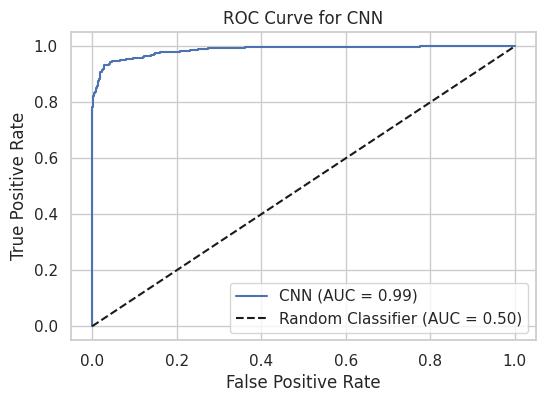

CNN AUC: 0.99


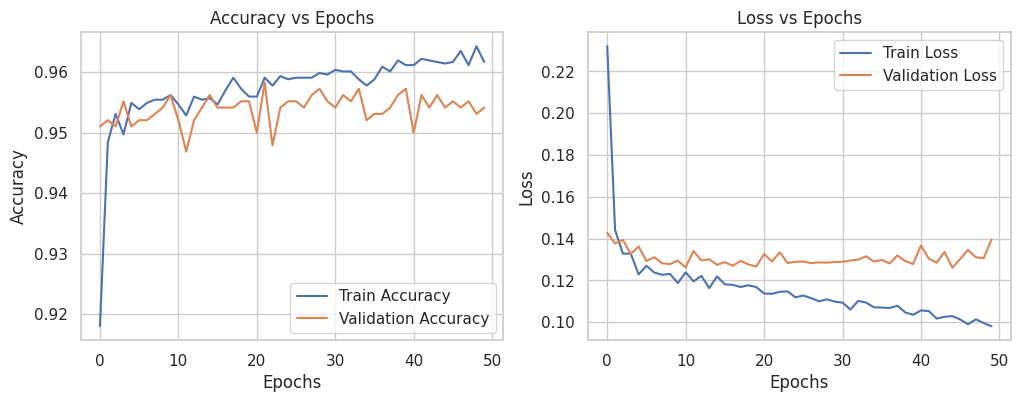

In [ ]:
# Step 6: ROC Curve and AUC
y_pred_prob_cnn = cnn.predict(X_test_cnn).ravel()  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_cnn)
auc = roc_auc_score(y_test, y_pred_prob_cnn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'CNN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"CNN AUC: {auc:.2f}")

# Optional: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

RNN:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Preprocess data for RNN
# RNN expects a 3D input: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=2)  # Reshape to add a third dimension
X_test_rnn = np.expand_dims(X_test, axis=2)

In [ ]:
# Step 2: Build the RNN model using LSTM
rnn = Sequential()

# Add LSTM layer
rnn.add(LSTM(units=64, activation='tanh', input_shape=(X_train_rnn.shape[1], 1)))

# Add Dropout for regularization
rnn.add(Dropout(0.5))

# Add a Dense layer
rnn.add(Dense(32, activation='relu'))

# Output layer (sigmoid for binary classification)
rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3: Train the model
history = rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8888 - loss: 0.4319 - val_accuracy: 0.9219 - val_loss: 0.2099
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9361 - loss: 0.1820 - val_accuracy: 0.9312 - val_loss: 0.1877
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9314 - loss: 0.1788 - val_accuracy: 0.9354 - val_loss: 0.1793
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9329 - loss: 0.1650 - val_accuracy: 0.9375 - val_loss: 0.1785
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9410 - loss: 0.1678 - val_accuracy: 0.9354 - val_loss: 0.1688
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9488 - loss: 0.1475 - val_accuracy: 0.9365 - val_loss: 0.1644
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9460 - loss: 0.1439 - val_accuracy: 0.9448 - val_loss: 0.1601
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9430 - loss: 0.1499 - val_accuracy: 0.

In [ ]:
# Step 4: Predict on the test set
y_pred_rnn = (rnn.predict(X_test_rnn) > 0.5).astype(int)
# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_rnn)
print("RNN Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rnn))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RNN Accuracy: 0.9408333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       613
           1       0.94      0.94      0.94       587

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



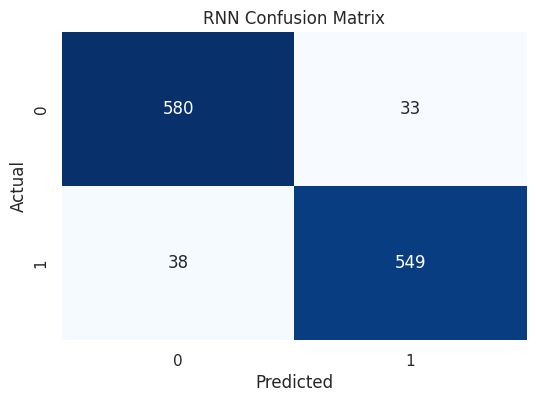

In [ ]:
# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('RNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


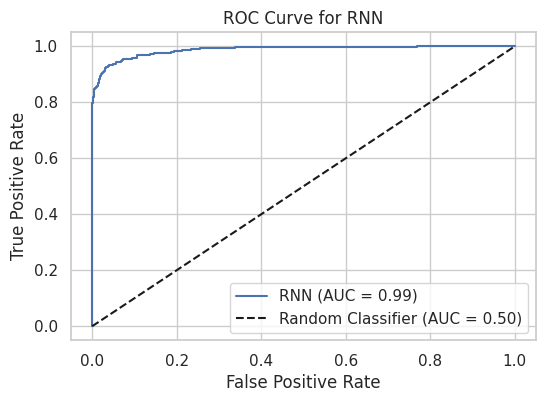

RNN AUC: 0.99


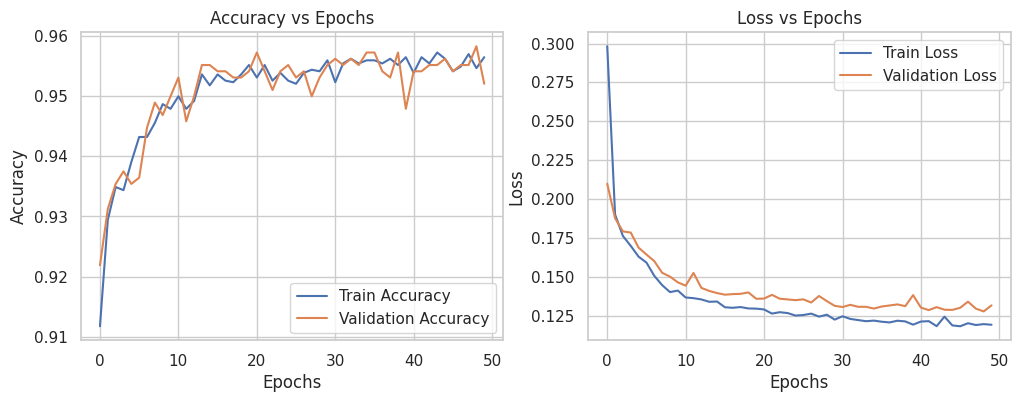

In [ ]:
# Step 6: ROC Curve and AUC
y_pred_prob_rnn = rnn.predict(X_test_rnn).ravel()  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rnn)
auc = roc_auc_score(y_test, y_pred_prob_rnn)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'RNN (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RNN')
plt.legend(loc='lower right')
plt.show()

# Print AUC value
print(f"RNN AUC: {auc:.2f}")

# Optional: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Outlier Removal:

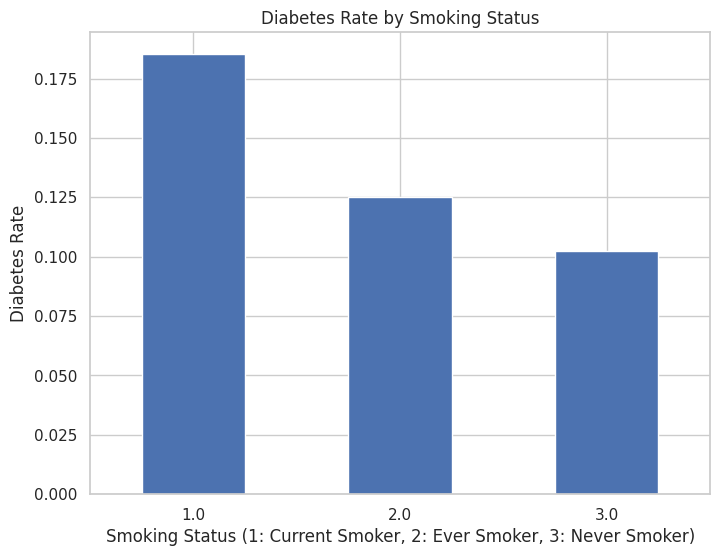

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter the dataset to remove invalid smoking status values
# Assuming valid smoking statuses are 1 (Current Smoker), 2 (Ever Smoker), and 3 (Never Smoker)
df_filtered = df[df['smoking'].isin([1, 2, 3])]

# Step 2: Calculate diabetes rate by smoking status
smoking_diabetes_rate = df_filtered.groupby('smoking')['Diabetes'].mean()

# Step 3: Plot the filtered data
plt.figure(figsize=(8, 6))
smoking_diabetes_rate.plot(kind='bar')
plt.title('Diabetes Rate by Smoking Status')
plt.xlabel('Smoking Status (1: Current Smoker, 2: Ever Smoker, 3: Never Smoker)')
plt.ylabel('Diabetes Rate')
plt.xticks(rotation=0)
plt.show()

Subgroup Analysis:

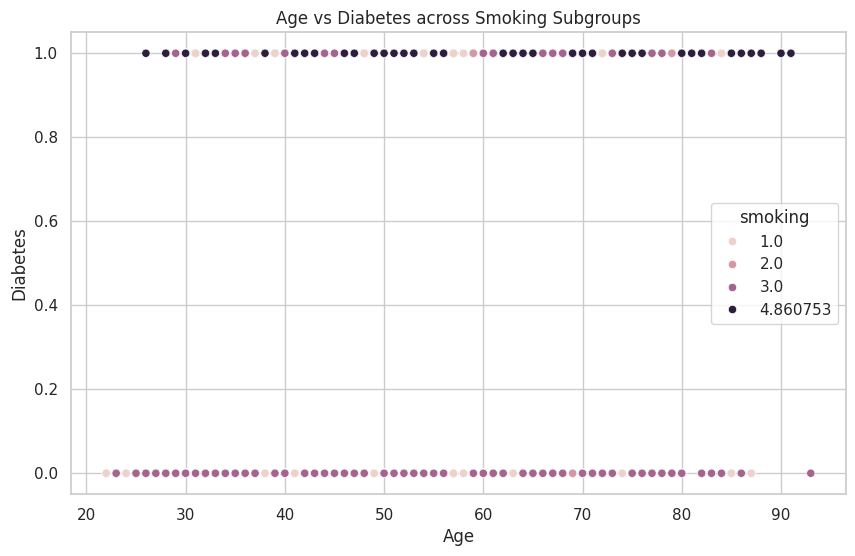

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with the features like 'smoking', 'drinking', 'family_histroy', 'BMI', 'Age', etc.

# Step 1: Group by Smoking Status and Analyze Age vs Diabetes
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Diabetes', hue='smoking', data=df)
plt.title('Age vs Diabetes across Smoking Subgroups')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.show()

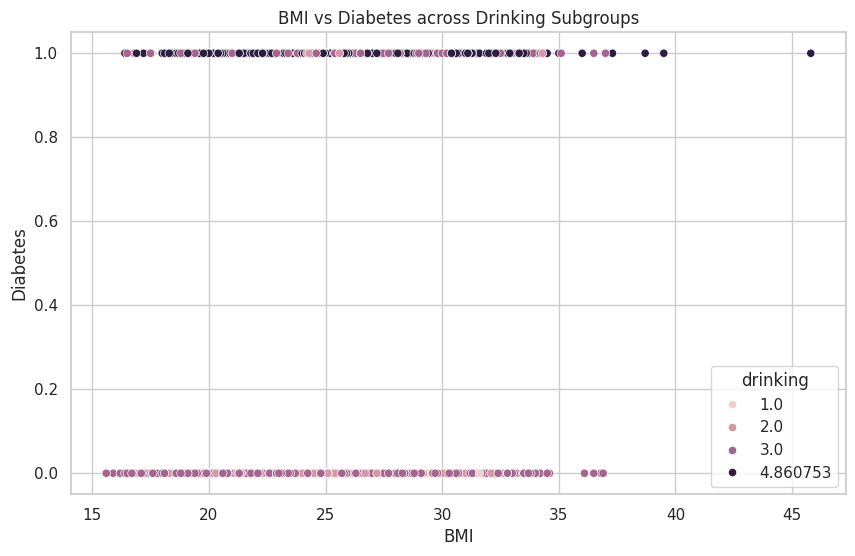

In [ ]:
# Step 2: Group by Drinking Status and Analyze BMI vs Diabetes
plt.figure(figsize=(10,6))
sns.scatterplot(x='BMI', y='Diabetes', hue='drinking', data=df)
plt.title('BMI vs Diabetes across Drinking Subgroups')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.show()

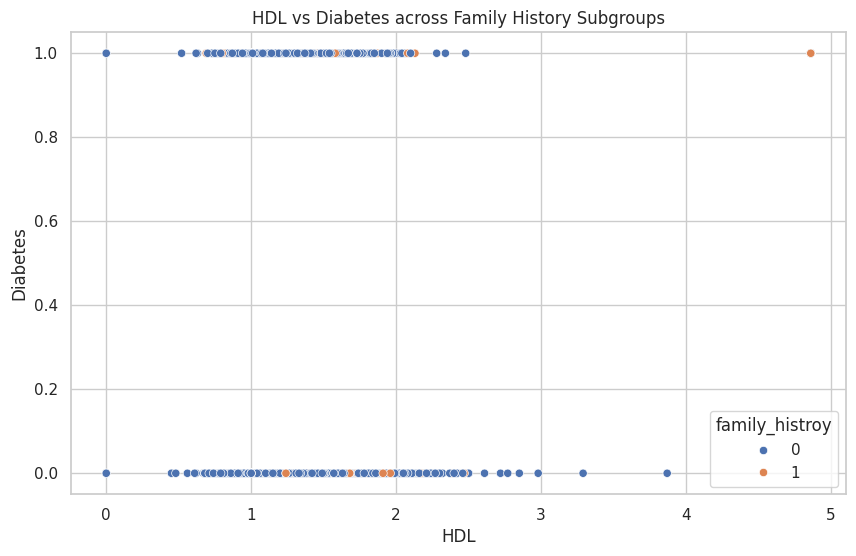

In [ ]:
# Step 3: Group by Family History and Analyze HDL vs Diabetes
plt.figure(figsize=(10,6))
sns.scatterplot(x='HDL', y='Diabetes', hue='family_histroy', data=df)
plt.title('HDL vs Diabetes across Family History Subgroups')
plt.xlabel('HDL')
plt.ylabel('Diabetes')
plt.show()

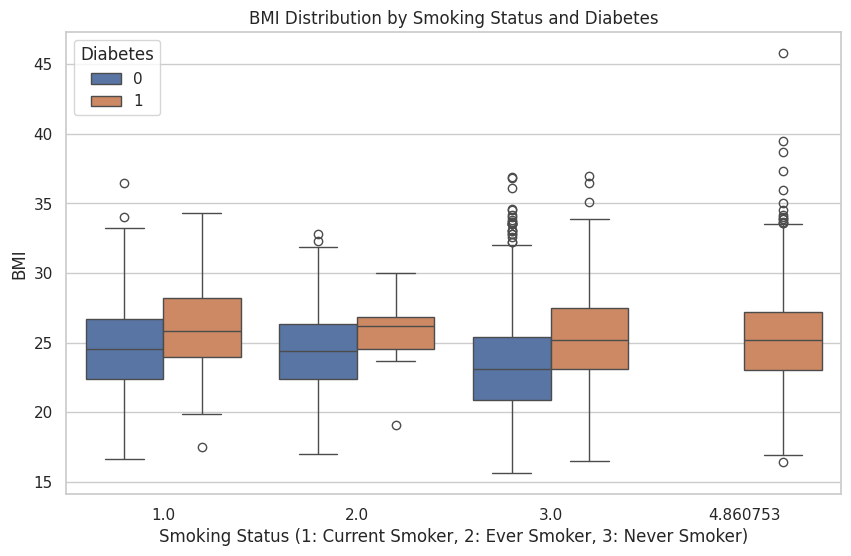

In [ ]:
# Step 4: Boxplot for BMI across Smoking Subgroups to Analyze Distribution by Diabetes Status
plt.figure(figsize=(10,6))
sns.boxplot(x='smoking', y='BMI', hue='Diabetes', data=df)
plt.title('BMI Distribution by Smoking Status and Diabetes')
plt.xlabel('Smoking Status (1: Current Smoker, 2: Ever Smoker, 3: Never Smoker)')
plt.ylabel('BMI')
plt.show()

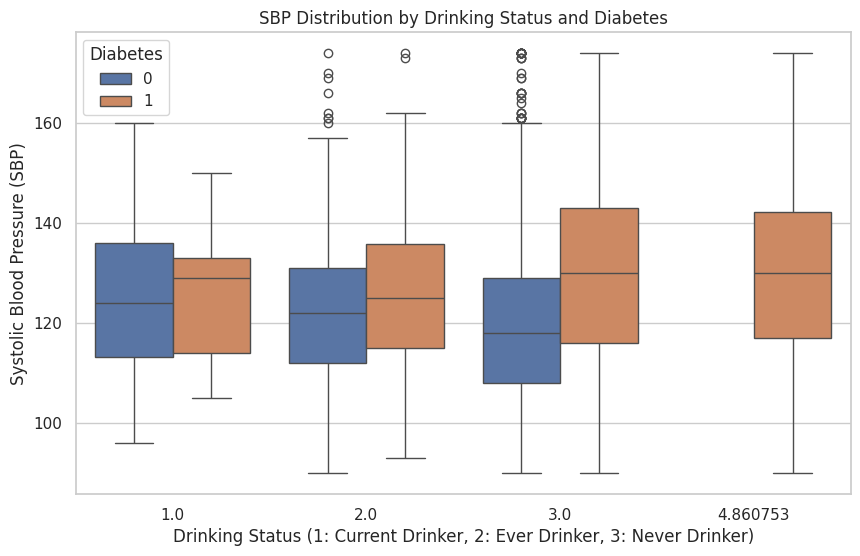

In [ ]:
# Step 5: Boxplot for SBP across Drinking Subgroups to Analyze Distribution by Diabetes Status
plt.figure(figsize=(10,6))
sns.boxplot(x='drinking', y='SBP', hue='Diabetes', data=df)
plt.title('SBP Distribution by Drinking Status and Diabetes')
plt.xlabel('Drinking Status (1: Current Drinker, 2: Ever Drinker, 3: Never Drinker)')
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.show()

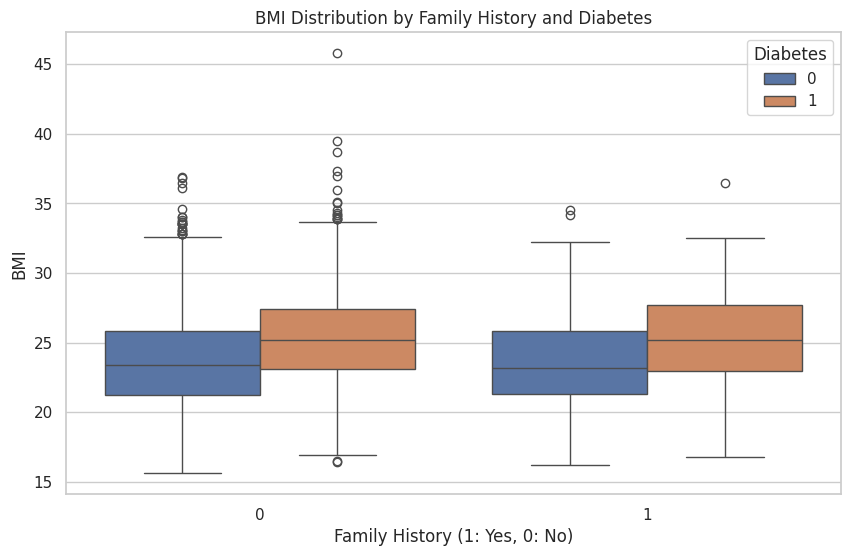

In [ ]:
# Step 6: Boxplot for BMI across Family History Subgroups to Analyze Distribution by Diabetes Status
plt.figure(figsize=(10,6))
sns.boxplot(x='family_histroy', y='BMI', hue='Diabetes', data=df)
plt.title('BMI Distribution by Family History and Diabetes')
plt.xlabel('Family History (1: Yes, 0: No)')
plt.ylabel('BMI')
plt.show()

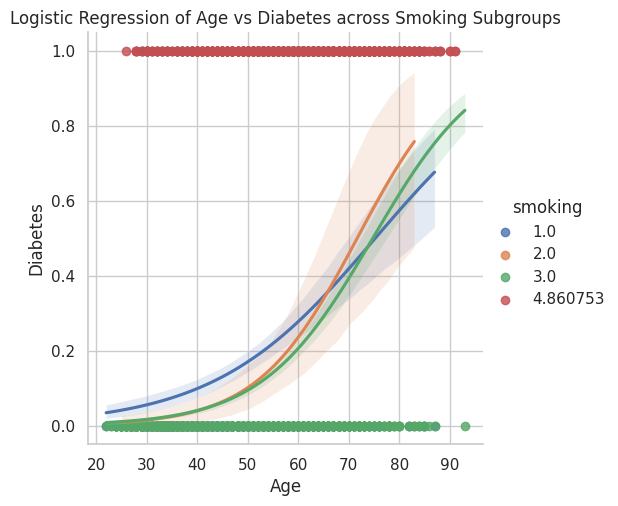

In [ ]:
# Step 7: Logistic Regression Plot for Age vs Diabetes in Smoking Subgroups
sns.lmplot(x='Age', y='Diabetes', hue='smoking', data=df, logistic=True)
plt.title('Logistic Regression of Age vs Diabetes across Smoking Subgroups')
plt.xlabel('Age')
plt.ylabel('Diabetes')
plt.show()

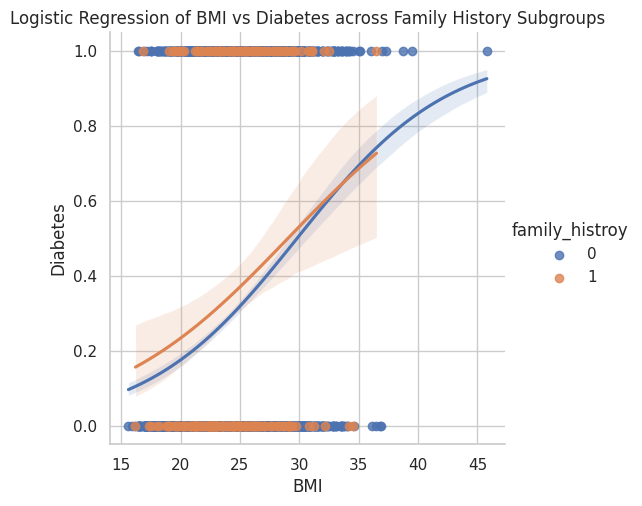

In [ ]:
# Step 9: Logistic Regression Plot for BMI vs Diabetes in Family History Subgroups
sns.lmplot(x='BMI', y='Diabetes', hue='family_histroy', data=df, logistic=True)
plt.title('Logistic Regression of BMI vs Diabetes across Family History Subgroups')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.show()

In [ ]:
# -------------- Step 7: Model Evaluation and Comparison --------------
# Compare all models based on accuracy
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Machine', 'Gradient Boosting', 'XGBoost', 'ANN', 'CNN', 'RNN']
accuracies = [accuracy_score(y_test, best_logreg.predict(X_test)),
              accuracy_score(y_test, rf.predict(X_test)),
              accuracy_score(y_test, dt.predict(X_test)),
              accuracy_score(y_test, svm.predict(X_test)),
              accuracy_score(y_test, gbm.predict(X_test)),
              accuracy_score(y_test, best_xgb_model.predict(X_test)),
              ann_accuracy,
              cnn_accuracy,
              rnn_accuracy]

plt.figure(figsize=(12, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

NameError: name 'best_logreg' is not defined

Explainability:

SHAP:
Using shap.sample() to randomly sample K points:

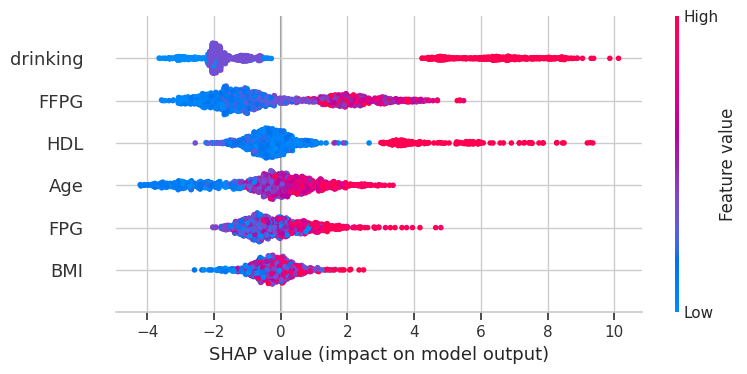

In [ ]:
import shap
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Check if best_xgb_model is defined
if 'best_xgb_model' not in locals():
  # If not defined, train your XGBoost model here
  # This is just an example, replace with your actual model training code
  best_xgb_model = xgb.XGBClassifier() # Initialize the classifier
  best_xgb_model.fit(X_train, y_train) # Assuming you have X_train and y_train available

# Create an explainer object
explainer = shap.Explainer(best_xgb_model) # Assuming best_xgb_model is your trained model

# Calculate SHAP values
shap_values = explainer(X_test)

# Now you can generate the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [ ]:
# Check the shape and type of shap_values
print(type(shap_values))
print(len(shap_values))  # If it's a list, check the number of items
print(shap_values[0].shape)  # Check the shape of the first element (for class 0)
print(shap_values[1].shape)  # Check the shape of the second element (for class 1, if binary classification)


<class 'shap._explanation.Explanation'>
1200
(6,)
(6,)


In [ ]:
import shap

# Assuming you want to plot the force plot for the first test instance
shap.initjs()

# Use shap_values[index] to access the SHAP values for the first sample
shap.force_plot(shap_values.base_values[0], shap_values.values[0], X_test[0], feature_names=X.columns)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined X_train and X_test
scaler = StandardScaler()

# Fit the scaler on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


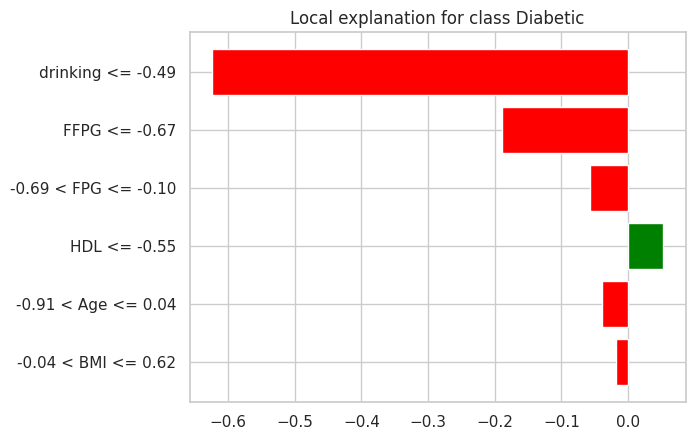

In [ ]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler # Assuming this is needed for your X_train_scaled
import xgboost as xgb # Assuming you are using the xgboost model from previous cells

# Assuming you have already defined X_train and X_test
scaler = StandardScaler()

# Fit the scaler on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assuming X_test_scaled is now defined and feature names are available
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled,
                                                   feature_names=X.columns,
                                                   class_names=['Non-Diabetic', 'Diabetic'],
                                                   mode='classification')

# Define and train your model
model = xgb.XGBClassifier() # Replace with your actual model if different
model.fit(X_train_scaled, y_train) # Use the scaled data for training

# Explain a single instance (e.g., the first test sample)
exp = explainer.explain_instance(X_test_scaled[0], model.predict_proba, num_features=10)

# Show the explanation as a plot
exp.as_pyplot_figure()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import shap


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (SVM often works better with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Use shap.sample() to randomly select K samples from the training data for background
K = 100  # Number of background samples to use
X_train_sampled = shap.sample(X_train_scaled, K)

# Apply SHAP for explainability with the sampled background data
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train_sampled)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary for the first class (index 0)
shap.summary_plot(shap_values[:,:,0], X_test_scaled, feature_names=X.columns)


Using shap.kmeans() to cluster the data into K clusters:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import shap



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (SVM often works better with standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Use shap.kmeans() to summarize the data into K clusters
K = 100  # Number of clusters to use for background
X_train_kmeans = shap.kmeans(X_train_scaled, K)

# Apply SHAP for explainability with k-means clustered background data
explainer = shap.KernelExplainer(svm_model.predict_proba, X_train_kmeans)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary for the first class (index 0)
# The shap_values array has shape (num_samples, num_features, num_classes) for multi-class problems.
# Here we select the SHAP values for the first class.
shap.summary_plot(shap_values[:,:,0], X_test_scaled, feature_names=X.columns)


RNN using Lime:

In [ ]:
!pip install lime
#Install the missing lime package

In [ ]:
# LIME Tabular Explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_scaled,
                                                        feature_names=X.columns,
                                                        class_names=['Non-Diabetic', 'Diabetic'],
                                                        mode='classification')

# Generate LIME explanation for a single test instance (e.g., first test sample)
exp_log_reg = explainer_lime.explain_instance(X_test_scaled[0], log_reg.predict_proba, num_features=10)

# Show explanation as a table
exp_log_reg.show_in_notebook(show_table=True)

# Plot the explanation
exp_log_reg.as_pyplot_figure()
plt.show()


In [ ]:
# Define a function that reshapes the input for the RNN model and outputs probabilities
def rnn_predict_proba(data):
    reshaped_data = np.reshape(data, (data.shape[0], 1, data.shape[1]))  # Reshape for RNN input
    return np.hstack((1 - rnn_model.predict(reshaped_data), rnn_model.predict(reshaped_data)))

# Generate LIME explanation for a single test instance (e.g., first test sample)
exp_rnn = explainer_lime.explain_instance(X_test_scaled[0], rnn_predict_proba, num_features=10)

# Show explanation as a table
exp_rnn.show_in_notebook(show_table=True)

# Plot the explanation
exp_rnn.as_pyplot_figure()
plt.show()
